 ╔══<i><b>Alai-DeepLearning</b></i>═══════════════════════════╗
###  &nbsp;&nbsp; **✎&nbsp;&nbsp;week 4. Tensorflow basis**
# Section 2. 변수와 상수 다루기

### _Objective_
1. 텐서플로우에서 모든 연산은 Node로 구성되어 있습니다. <br>
2. 이번 수업에서는 텐서플로우에서 수를 다루는 Node들에 대해 배워보겠습니다. <br>

╚════════════════════════════════════════╝

In [1]:
%matplotlib inline
import numpy as np
import tensorflow as tf 
import matplotlib.pyplot as plt

### [Optional.  Tensorflow Graph Visualization ]

---

> _Jupyter에서 Tensorflow에서 구성되는 Graph를 시각적으로 보여주기 위한 helper 메소드입니다._<br>


In [2]:
from IPython.display import clear_output, Image, display, HTML
import numpy as np    

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = "<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))

# \[ 1.Constant  \]

---

---

>  Tensorflow 을 이용해 상수를 만드는 법을 알아봅니다. 

 ## 1. 상수 만들기 

---

+ 상수(Constant)는 변하지 않는 값입니다. 상수를 생성하는 Node를 만드는 법에 대해 알아봅니다.

### (1) Tensorflow 로 상수를 만드는 법  
`tf.constant` 을 이용해 상수 Tensor 을 만들 수 있습니다.

In [3]:
a=tf.constant(3, name='const0')
sess = tf.Session()
sess.run(a)

3

### (2) python value , list 을 이용한 Constant Tensor 만들기
list을 이용해 상수 Tensor를 만들 수 있습니다. 

In [4]:
tf.reset_default_graph()
a = tf.constant(3, name='const_0')
b = tf.constant([1,2,3,4], name='const_1') 
sess = tf.Session()
a_ ,b_ = sess.run([a,b])
print(a_, b_)

3 [1 2 3 4]


In [5]:
tf.reset_default_graph()
a = tf.constant([3], shape=[1,2], name='const_0')
sess = tf.Session()
a_ = sess.run(a)
print(a_)

[[3 3]]


### (3)  Numpy 을 이용해 Constant Tensor 만들기
numpy.array을 이용해 상수 Tensor를 만들수 있습니다. 

In [6]:
tf.reset_default_graph()
a = np.array([1, 2, 3])
tensor_a = tf.constant(a, name='const_0')
sess = tf.Session()
a_ = sess.run(tensor_a)
print(a_)

[1 2 3]


### 예제 1)
numpy 을 이용해  -10 ~ 10 까지 0.01  단위로 <br>
`t * tf.sin(t) / 3 + 2 * tf.sin(t * 5)`  을 통과시킨 후 <br>
해당 ndarray 을 텐서로 변환해 보세요. 그리고 화면에 출력해 보세요

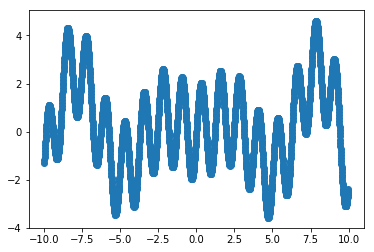

In [7]:
xs = np.arange(-10,10,0.01)
ys = xs * tf.sin(xs) / 3 + 2 * tf.sin(xs *5 )

sess = tf.Session()
ys_ = sess.run(ys)

plt.scatter(xs, ys_)
plt.show()

 ## 2. 무작위 상수 만들기 

---

+ random 으로 뽑혀지는 상수를 만들수 있습니다. 

### (1) random_normal 
보통 확률에서 normal 이란 정규 분포를 의미 합니다. <br>
정규 분포는 mean 에 가까울수록 높은 확률로 뽑힙니다. <br>
stddev 가 낮을수록 mean 에 가까운 숫자들이 뽑힐 확률이 높습니다. <br> 
`tf.random_normal(mean , stddev , name)` 을 이용해 만들수 있습니다 

In [8]:
rand_const = tf.random_normal(shape=[] , mean=0.0 , stddev=1.0 ,name='rand_const')
print(rand_const)
sess = tf.Session()
sess.run(rand_const)

Tensor("rand_const:0", shape=(), dtype=float32)


1.5126401

### 예제 1)
tf.random_normal 을 이용해서 shape = [2,2 ] 이고 mean =0.0 stddev = 1.0 인 Tensor 을 만들어 보세요.<br> 그리고 실행시켜 보세요.

In [9]:
rand_normal = tf.random_normal(mean=0.0 , stddev=1.0 , shape=[2,2])
sess = tf.Session()
sess.run(rand_normal)

array([[-1.430562  ,  1.249702  ],
       [-0.92942506, -0.41294512]], dtype=float32)

### 예제 2)
tf.random_normal 을 이용해서 <br>
shape = [28,28 ] 이고 <br>
mean =0.0 stddev = 0.1 , mean =0.0 stddev = 1.0, mean =0.0 stddev = 10.0<br>
인 Tensor 을 만들어 보세요.<br> 
그리고 실행시켜 보세요.<br>
matplotlib  을 이용해 각각의 결과를  하나의 figure 에 에 출력해 보세요


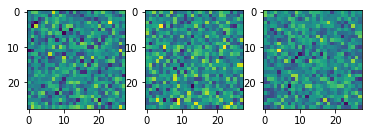

In [10]:
rand_normal = tf.random_normal(mean=0.0 , stddev=0.1 , shape=[28,28])
rand_normal_1 = tf.random_normal(mean=0.0 , stddev=1.0 , shape=[28,28])
rand_normal_2 = tf.random_normal(mean=0.0 , stddev=10.0 , shape=[28,28])
sess = tf.Session()
rand_noraml_, rand_normal_1_, rand_normal_2_ = sess.run([rand_normal,rand_normal_1,rand_normal_2])
fig = plt.figure()
ax = fig.add_subplot(1,3,1)
ax.imshow(rand_noraml_)
ax = fig.add_subplot(1,3,2)
ax.imshow(rand_normal_1_)
ax = fig.add_subplot(1,3,3)
ax.imshow(rand_normal_2_)

plt.show()

### 예제 3)
tf.random_normal 을 이용해서<br>
mean =0.0 stddev = 0.1 ,<br>
mean =0.0 stddev = 1.0, <br>
mean =0.0 stddev = 10.0  일때, <br> 
10000개의 값을  만들고 histogram 을 만들어 보세요<br>
matplotlib  을 이용해 각각의 결과를  하나의 figure 에 에 출력해 보세요


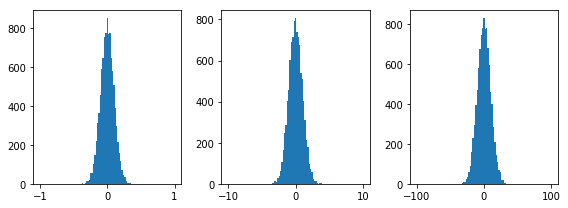

In [11]:
rand_normal = tf.random_normal(mean=0.0 , stddev=0.1 , shape=[10000])
rand_normal_1 = tf.random_normal(mean=0.0 , stddev=1.0 , shape=[10000])
rand_normal_2 = tf.random_normal(mean=0.0 , stddev=10.0 , shape=[10000])
sess = tf.Session()
rand_noraml_, rand_normal_1_, rand_normal_2_ = sess.run([rand_normal,rand_normal_1,rand_normal_2])

fig = plt.figure(figsize=(8,3))
ax = fig.add_subplot(1,3,1)
ax.hist(rand_noraml_, bins=np.linspace(-1,1,100))
ax = fig.add_subplot(1,3,2)
ax.hist(rand_normal_1_,bins=np.linspace(-10,10,100))
ax = fig.add_subplot(1,3,3)
ax.hist(rand_normal_2_,bins=np.linspace(-100,100,100))

plt.tight_layout()
plt.show()

### (2) random_uniform 
보통 확률에서 uniform  이란  같은 확률이라는 뜻입니다. <br>
uniform 은 인자로 min 값과 max 값을 지정할수 있습니다 .<br>
tf.random_uniform(shape=, minval, maxval)  을 이용해 만들수 있습니다.<br> 





### 예제 1)
tf.random_uniform 을 이용해서<br>
minval =0.0 maxval = 0.1 ,<br>
minval = -1.0 maxval = 1.0, <br>
minval = -100.0 maxval = 100.0, <br> 
10000개의 값을  만들고 histogram 을 만들어 보세요<br>
matplotlib  을 이용해 각각의 결과를  하나의 figure 에 에 출력해 보세요


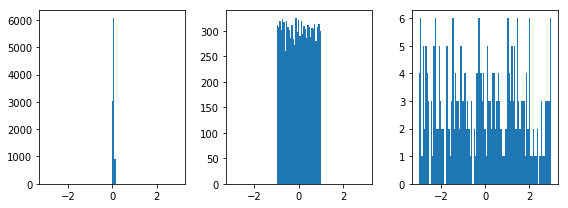

In [12]:
rand_uniform = tf.random_uniform(minval=0.0 , maxval=0.1 , shape=[10000])
rand_uniform_1 = tf.random_uniform(minval=-1.0 , maxval=1.0 , shape=[10000])
rand_uniform_2 = tf.random_uniform(minval=-100.0 , maxval=100.0 , shape=[10000])
sess = tf.Session()
rand_noraml_, rand_uniform_1_, rand_uniform_2_ = sess.run([rand_uniform,rand_uniform_1,rand_uniform_2])

fig = plt.figure(figsize=(8,3))
ax = fig.add_subplot(1,3,1)
ax.hist(rand_noraml_, bins=np.linspace(-3,3,100))
ax = fig.add_subplot(1,3,2)
ax.hist(rand_uniform_1_,bins=np.linspace(-3,3,100))
ax = fig.add_subplot(1,3,3)
ax.hist(rand_uniform_2_,bins=np.linspace(-3,3,100))

plt.tight_layout()
plt.show()

### (3) truncated random_normal 
turncate 라는 뜻은 자르다 라는 뜻입니다. 정규 분포가 일정 이상 값의 범위가 넘어가지 못하게 만듭니다. <br>
`tf.random.truncated_normal(shape=,mean=0.0,stddev=1.0,) ` 을 이용합니다. 

In [13]:
rand_normal=tf.random.truncated_normal(shape=[],mean=0.0,stddev=1.0,)
sess = tf.Session()
sess.run(rand_normal)

0.6179632

### 예제 1)
histogram  을 이용해 
tf.random_random , tf.random.truncated_normal 을 이용해
shape = 10000 , mean = 0.0 , stddev = 1.0 인 Tensor 을 만들고 histogram 을 출력해보세요
<br>
matplotlib  을 이용해 각각의 결과를  하나의 figure 에 에 출력해 보세요


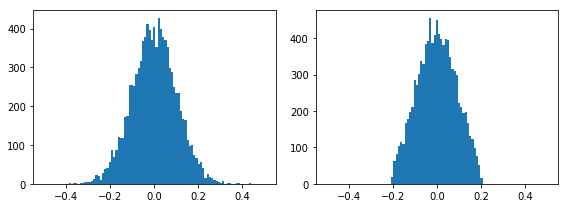

In [14]:
rand_uniform = tf.random_normal(mean=0.0 , stddev=0.1 , shape=[10000])
rand_uniform_1 = tf.random.truncated_normal(mean=0.0 , stddev=0.1 , shape=[10000])
sess = tf.Session()
rand_noraml_, rand_uniform_1_ = sess.run([rand_uniform,rand_uniform_1])

fig = plt.figure(figsize=(8,3))
ax = fig.add_subplot(1,2,1)
ax.hist(rand_noraml_, bins=np.linspace(-0.5, 0.5,100))
ax = fig.add_subplot(1,2,2)
ax.hist(rand_uniform_1_,bins=np.linspace(-0.5, 0.5 ,100))
plt.tight_layout()
plt.show()

# \[ 2 .Variable  \]

---

---

>  Tensorflow 에서  변수를 만드는 법을 알아봅니다. 

 ## 1. 변수  만들기 

---

+ Tensorflow에서의 모든 Tensor는 한번 연산하고 지워지는, **휘발성**인 정보들입니다.
+ 유일하게 값을 저장할 수 있는 Tensor가 `Variable`입니다.



### (1) Tensorflow 로 변수를 만드는 법  
`tf.Variable`를 통해 변수를 생성할 수 있습니다. 

In [15]:
tf.reset_default_graph()
var = tf.Variable(3, name='var')
print(var)

Instructions for updating:
Colocations handled automatically by placer.
<tf.Variable 'var:0' shape=() dtype=int32_ref>




변수는 크게 4가지의 Node로 구성되어 있습니다.

In [16]:
default_graph = tf.get_default_graph()
default_graph.get_operations()

[<tf.Operation 'var/initial_value' type=Const>,
 <tf.Operation 'var' type=VariableV2>,
 <tf.Operation 'var/Assign' type=Assign>,
 <tf.Operation 'var/read' type=Identity>]

In [17]:
show_graph(default_graph)

* 어떤 값으로 초기화할 것인지를 결정하는 `initial_value`
* 값을 저장한 부분인 `Variable`
* 값을 갱신하는 부분인 `Assign`
* 값을 읽어오는 부분인 `Read`

### (2) `get_variable`

변수를 만드는 함수에는 Variable 외에 `get_variable`이 있습니다. 

In [18]:
tf.reset_default_graph()
var = tf.get_variable(name='var2',initializer=3)
print(var)

<tf.Variable 'var2:0' shape=() dtype=int32_ref>


In [19]:
var = tf.get_variable(name='var2',initializer=3)
print(var)

ValueError: Variable var2 already exists, disallowed. Did you mean to set reuse=True or reuse=tf.AUTO_REUSE in VarScope? Originally defined at:

  File "<ipython-input-18-40537a2a022d>", line 2, in <module>
    var = tf.get_variable(name='var2',initializer=3)
  File "/Users/ksj/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3267, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/Users/ksj/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3185, in run_ast_nodes
    if (yield from self.run_code(code, result)):


tf.Variable 은 같은 이름을 가진 tensor 가 있으면  뒤에 숫자를 하나 증가 시킵니다. 가령 
var  이란 이름으로 변수를 만들었는데 해당 이름이 있으면 뒤에 _1 을 붙입니다.  var -> var_1 

반면에 tf.get_variable 은 엄격히 이름을 관리합니다. 만약 이름이 같으면 Tensor 을 생성하지 않고 오류를 발생 시킵니다. 

## 2. 변수 초기화
----
* 변수를 실행하기 위해서는 반드시 해당 변수를 초기화 해야 합니다.
* 초기화를 실행하기 위해서는 변수의 초기화 노드인 initalizer 을 수행해야 합니다. 


### (1) 변수를 초기화 하는 법
변수는 생성하고 반드시 Session 에서 초기화를 진행해야 합니다. 

In [ ]:
tf.reset_default_graph()
var_0 = tf.Variable(3, name='var_0')
var_1 = tf.get_variable(initializer=3, name='var_1') 

sess = tf.Session()
var_0_, var_1_=sess.run([var_0, var_1])
print(var_0_, var_1_)

초기화 하지 않으면 위처럼 에러가 발생합니다.

In [ ]:
sess = tf.Session()
sess.run([var_0.initializer, var_1.initializer])
var_0_, var_1_=sess.run([var_0, var_1])
print(var_0_, var_1_)

### (2) list로 초기화하기
python value나 list 을 이용해 상수 텐서를 만들수 있습니다. <br>
tf.Variable 에 초기값을 넣어주려면 `initial_value` parameter 에다가 넣어줘야 합니다. <br>
tf.get_variable 에 초기값을 넣어주려면 `initializer` parameter 에다가 넣어줘야 합니다. 

In [20]:
tf.reset_default_graph()
var_0= tf.get_variable(name='var2',initializer=3)
var_1 = tf.Variable(initial_value=[1, 2, 3], name='var')

sess = tf.Session()
sess.run([var_0.initializer , var_1.initializer])
sess.run([var_0, var_1])

[3, array([1, 2, 3], dtype=int32)]

### (3) numpy로 초기화하기
numpy.array 을 이용해 변수 텐서를 만들수 있습니다. 

In [21]:
tf.reset_default_graph()
a = np.array([1, 2, 3])
var_0 = tf.Variable(initial_value=a, name='const_0')
var_1 = tf.get_variable(initializer=a, name='const_1')
sess = tf.Session()
sess.run([var_0.initializer , var_1.initializer])
sess.run([var_0, var_1])

[array([1, 2, 3]), array([1, 2, 3])]

### (4)  랜덤 함수로 초기화하기
random 함수를 이용해서 변수 텐서를 만들수 있습니다. 

In [22]:
tf.reset_default_graph()
random_normal = tf.random_normal((3,),name='random_init')
var_0 = tf.Variable(initial_value=random_normal,
                    name='const_0')
var_1 = tf.get_variable(initializer=random_normal,
                        name='const_1')
sess = tf.Session()
sess.run([var_0.initializer , var_1.initializer])
sess.run([var_0, var_1])

[array([ 1.0716224 , -0.41343948, -0.35676432], dtype=float32),
 array([ 1.0716224 , -0.41343948, -0.35676432], dtype=float32)]

하나의 random 함수로 초기화를 하면, 의도치 않게 같은 값으로 초깃값이 고정될 수 있습니다.

In [23]:
tf.reset_default_graph()
var_0 = tf.Variable(tf.random_normal((3,)),
                    name='const_0')
var_1 = tf.get_variable(initializer=tf.random_normal((3,)),
                        name='const_1')
sess = tf.Session()
sess.run([var_0.initializer , var_1.initializer])
sess.run([var_0, var_1])

[array([-0.06081372,  0.2224334 ,  0.80264765], dtype=float32),
 array([-0.8698679 , -0.37909973, -0.15382522], dtype=float32)]

## 3. 변수를 갱신하기 
---
* 변수는 변하는 값 입니다.  변수의 값을 어떻게 바꾸는 지 알아 봅니다.

### (1) 변수의 값을 바꾸는 법
`tf.assign(ref= , value= )` <br>
`tf.assign_add(ref= , value= )`  <br>
`tf.assign_sub(ref= , value= )`  을 이용해 변수의 값을 바꿀수 있습니다. 


In [24]:
tf.reset_default_graph()
var_0 = tf.Variable(3, name='var_0')
var_1 = tf.get_variable(initializer=4, name='var_1') 
var_2 = tf.Variable(3, name='var_2')

assign_0 = tf.assign(ref=var_0, value=7)
assign_1 = tf.assign_add(ref=var_1, value=9)
assign_2 = tf.assign_sub(ref=var_2, value=7)
sess = tf.Session()

# 변수 초기화
sess.run([var_0.initializer, var_1.initializer,var_2.initializer])

# 갱신연산 전
print("Before")
var_0_, var_1_, var_2_ = sess.run([var_0, var_1,var_2])
print('var0 : {} \t var1 : {} \t var2 : {}'.format(var_0_, var_1_, var_2_))

# 갱신연산
asgn_0, asgn_1 ,asgn_2 = sess.run([assign_0, assign_1, assign_2])

# 갱신연산 후 
print("After")
var_0_, var_1_, var_2_ = sess.run([var_0, var_1,var_2])
print('var0 : {} \t var1 : {} \t var2 : {}'.format(var_0_, var_1_, var_2_))

Before
var0 : 3 	 var1 : 4 	 var2 : 3
After
var0 : 7 	 var1 : 13 	 var2 : -4


# \[ 3 .placeholder  \]

---

---

>  Tensorflow 에서  외부에서 값을 넣어주는  법을 알아봅니다. 

### (1) placeholder  만드는 법  

`tf.placeholder` ,  함수를 통해 외부에서 값을 넣어주는 변수를 생성할 수 있습니다. 

In [25]:
tf.reset_default_graph()

# tf.float32 이고 0차원 값을 넣어줍니다. 
a = tf.placeholder(shape=[] , dtype=tf.float32,name='a')

# tf.float32 이고, 1차원 값을 넣어줍니다. 0차원 갯수는 7개가 있어야 합니다.
b = tf.placeholder(shape=[7] , dtype=tf.float32,name='b')

# tf.float32 이고, ,2차원 값을 넣어줍니다. 1차원 갯수는 2개 0차원 갯수는 3개가 있어야 합니다. 
c = tf.placeholder(shape=[2,3] , dtype=tf.float32,name='c')

# tf.float32 이고, 3차원 값을 넣어줍니다. 2차원 갯수는 2개 1차원 갯수는 0차원 갯수는 4개가 있어야 합니다. 
d = tf.placeholder(shape=[2,3,4] , dtype=tf.float32,name='d')

### (2) placeholder  에 값을 넣어주는 법 
session 의 인자인 feed_dict 을 통해 tf.placeholder 에 값을 넣어줄 수 있습니다. <br>
feed_dict 은 이름처럼 dictionary 형태로 되어야 합니다. <br>
key 에는 tensor , node or tensor name , node name 이 들어가야 하고 <br>
value 에는 numpy.array 혹은 list등의 파이썬 값이 들어갑니다.


In [26]:
# tf.float32 이고 0차원 값을 넣어줍니다. 
a = tf.placeholder(shape=[] , dtype=tf.float32)
b = tf.placeholder(shape=[7] , dtype=tf.float32)
sess = tf.Session()
sess.run([a,b ],feed_dict={a: 0.0, b: np.arange(0,7,1)})

[array(0., dtype=float32), array([0., 1., 2., 3., 4., 5., 6.], dtype=float32)]

### (3) placeholder_default  에 값을 넣어주는 법 
tf.placeholder 에 값에 초기값을 넣어줄 수 있습니다. <br>
feed_dict 을 통해서 값이 들어오지 않으면 초기값을 사용합니다.

In [27]:
# tf.float32 이고 0차원 값을 넣어줍니다. 
a = tf.placeholder_with_default(input=3.0, shape=[])
# tf.float32 이고, 1차원 값을 넣어줍니다. 0차원 갯수는 7개가 있어야 합니다.

sess = tf.Session()
print(sess.run(a))
print(sess.run(a, feed_dict={a:9.2}))

3.0
9.2


#  

---

    Copyright(c) 2019 by Public AI. All rights reserved.<br>
    Writen by PAI, SangJae Kang ( rocketgrowthsj@publicai.co.kr )  last updated on 2019/03/22

---